In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

In [3]:
data = pd.read_csv('regression_part1.csv')
#print(data)
data.columns = ['x','y']
data = data.reindex(columns=list('b') + list(data.columns), fill_value=1)
#print(data.shape)
#print(type(data['y'][0]))


In [4]:
model = LR(fit_intercept = False)
LReg = model.fit(data.iloc[:,0:2],data.iloc[:,2])
y_predict = model.predict(data.iloc[:,0:2])

MSE(y_predict,np.array(data.iloc[:,2]))
#LReg.score(data.iloc[:,0:2],data.iloc[:,2])
#LReg.coef_
#print(data.iloc[:,0:2])

30.9854726145413

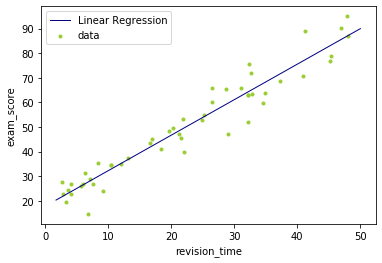

In [5]:
line_x = np.linspace(data['x'].min() - 1, data['x'].max() + 2 , 100)[:, np.newaxis]
line_xx = np.concatenate(( np.array([[1] for i in range(len(line_x))]), line_x),axis = 1)
line_y = LReg.predict(line_xx)

plt.scatter(data['x'], data['y'], color='yellowgreen', marker='.',label = 'data')
plt.plot(line_x, line_y,color='navy', linewidth=1, label='Linear Regression')
plt.xlabel("revision_time")
plt.ylabel("exam_score")
plt.legend()
plt.savefig("IAML_Q1c.png")
plt.show()


In [6]:
 #计算伪逆：
x = np.array(data.iloc[:,1:2])
y = np.array(data.iloc[:,2])
T_x = np.linalg.pinv(x.T.dot(x)) 
y_bar = x.dot(T_x.dot(x.T.dot(y-20)))
MSE(y_bar,y)
print(T_x.dot(x.T.dot(y-20)))



[1.37298851]


In [7]:
#---------- Question1(f) ----------#


In [8]:
#---------- Question1(g) ----------#
mse = []
mse_min = 999999
min_idx_w1 = 0
w = np.linspace(-2,2,100)
w0 = 20
for i, w1 in enumerate(w):
    
    sum = MSE(np.array(w1).dot(data['x']) + w0,data['y'] )
    #a = np.array(w1).dot(data['x']) + w0 -data['y']
    #sum = np.sum(a**2)
    if sum < mse_min:
        mse_min = sum
        min_idx_w1 = i
    mse.append(sum)
print(mse_min)
print(min_idx_w1)
print(w)

32.48096161535148
83
[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.2323

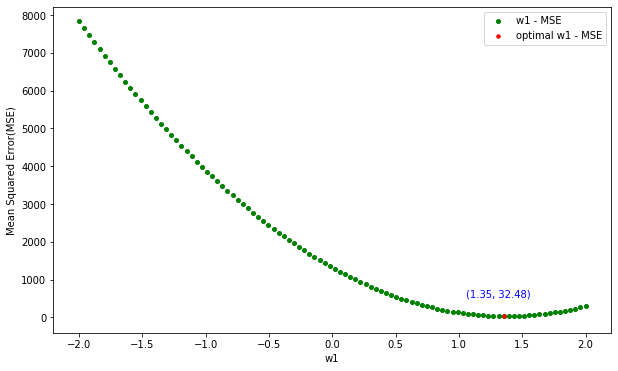

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(w,mse,s=16., color = 'green',label = 'w1 - MSE')
plt.scatter(w[83],mse[83],s=12., color = 'red',label = 'optimal w1 - MSE')
plt.text(w[83] - 0.3,mse[83] + 500,(round(w[83],2),round(mse[83],2)),color='b')
plt.xlabel('w1')
plt.ylabel('Mean Squared Error(MSE)')
plt.legend()
plt.savefig("IAML_Q1g.png")
plt.show()
